# Criaçao de dados Fake de uma loja de Pneus.

In [23]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta

# Configuração do Faker para gerar dados fictícios
fake = Faker('pt_BR')

# Geração dos dados
num_rows = 500000

# Geração de datas aleatórias dentro de um intervalo
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)

data = [fake.date_between(start_date=start_date, end_date=end_date) for _ in range(num_rows)]

# Geração de nomes fictícios de clientes
nomes_clientes = [fake.name() for _ in range(num_rows)]

# Geração de vendas (Direta ou Loja-Online)
tipo_venda = ['Direta', 'Loja-Online']
venda = [random.choice(tipo_venda) for _ in range(num_rows)]

# Geração de cidades do estado de São Paulo
cidades_sp = ['São Paulo', 'Campinas', 'Guarulhos', 'São Bernardo do Campo', 'Santo André', 'Osasco', 'Sorocaba', 'Ribeirão Preto', 'São José dos Campos', 'Mauá']
cidade = [random.choice(cidades_sp) for _ in range(num_rows)]

# Modelos de pneus
modelos_pneus = ['195/60 R15', '205/55 R16', '215/65 R17', '225/50 R18', '235/70 R19', '245/45 R20', '255/40 R21', '265/50 R22', '275/35 R23', '285/30 R24']
modelo_pneu = [random.choice(modelos_pneus) for _ in range(num_rows)]

# Valores de compra e venda
valores_compra = [round(random.uniform(100, 300), 2) for _ in range(num_rows)]
valores_venda = [round(valor_compra * random.uniform(1.1, 1.5), 2) for valor_compra in valores_compra]

# Tipos de pagamento
tipos_pagamento = ['Pix', 'Boleto', 'Credito']
tipo_pagamento = [random.choice(tipos_pagamento) for _ in range(num_rows)]

# Criando o DataFrame
df = pd.DataFrame({
    'Data': data,
    'Nome do Cliente': nomes_clientes,
    'Venda (Direta ou Loja-Online)': venda,
    'Cidade do Comprador': cidade,
    'Modelo do pneu': modelo_pneu,
    'Valor de compra': valores_compra,
    'Valor de venda': valores_venda,
    'Tipo de pagamento': tipo_pagamento
})

# Salvando os dados em um arquivo CSV
df.to_csv('dados_loja_pneus.csv', index=False)

print("Base de dados gerada e salva com sucesso.")




Base de dados gerada e salva com sucesso.


In [24]:
# Carregando o arquivo CSV
df = pd.read_csv('dados_loja_pneus.csv')

# Exibindo as primeiras linhas do DataFrame
df.head()

,Data,Nome do Cliente,Venda (Direta ou Loja-Online),Cidade do Comprador,Modelo do pneu,Valor de compra,Valor de venda,Tipo de pagamento
0,2023-03-12,Melissa Azevedo,Direta,São Paulo,255/40 R21,159.61,223.17,Pix
1,2023-03-12,Vitor Gabriel Cavalcanti,Loja-Online,São Paulo,285/30 R24,155.22,224.48,Credito
2,2023-07-14,Bárbara Duarte,Direta,Osasco,205/55 R16,226.33,298.88,Boleto
3,2023-09-01,Lívia Costela,Direta,Campinas,235/70 R19,115.79,136.74,Credito
4,2023-09-22,Isis da Mata,Loja-Online,São Paulo,255/40 R21,169.54,248.58,Boleto


# Analise basica de dados estatisticos.

In [72]:
df.describe()

,Valor de compra,Valor de venda
count,500000.000000,500000.000000
mean,200.011346,259.987017
std,57.763479,78.852431
min,100.000000,110.280000
25%,150.000000,193.310000
50%,200.090000,258.050000
75%,250.010000,322.500000
max,300.000000,449.390000


In [94]:
df.dtypes

Data                              object
Nome do Cliente                   object
Venda (Direta ou Loja-Online)     object
Cidade do Comprador               object
Modelo do pneu                    object
Valor de compra                  float64
Valor de venda                   float64
Tipo de pagamento                 object
dtype: object

# Analise de vendas

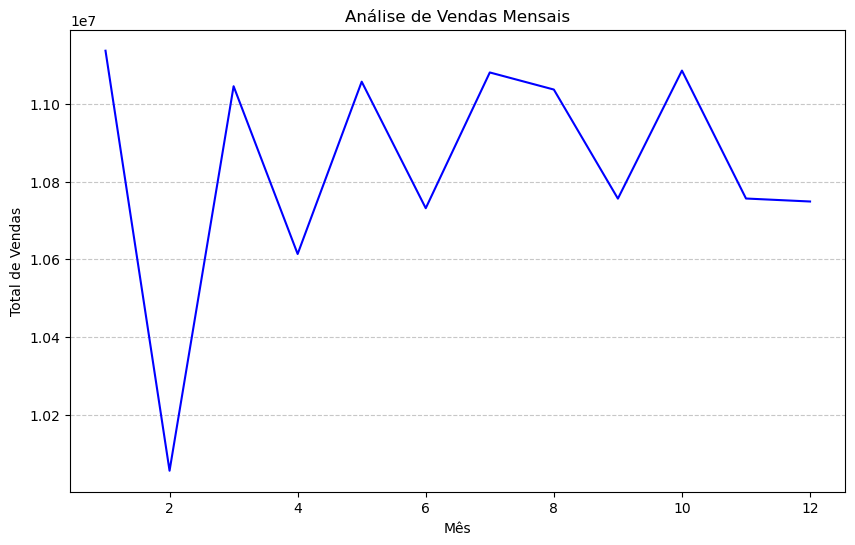

Janeiro foi o mes com maior numero de vendas, e Fevereiro o que apresentou menor desempenho nas vendas.


In [29]:
# Analise de Vendas Mensais

import matplotlib.pyplot as plt

# Converter a coluna 'Data' para o tipo datetime
dados['Data'] = pd.to_datetime(dados['Data'])

# Extrair o mês da coluna 'Data'
dados['Mês'] = dados['Data'].dt.month

# Agrupar os dados por mês e calcular o total de vendas em cada mês
vendas_mensais = dados.groupby('Mês')['Valor de venda'].sum()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
vendas_mensais.plot(kind='line', color='blue')
plt.title('Análise de Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print ('Janeiro foi o mes com maior numero de vendas, e Fevereiro o que apresentou menor desempenho nas vendas.')


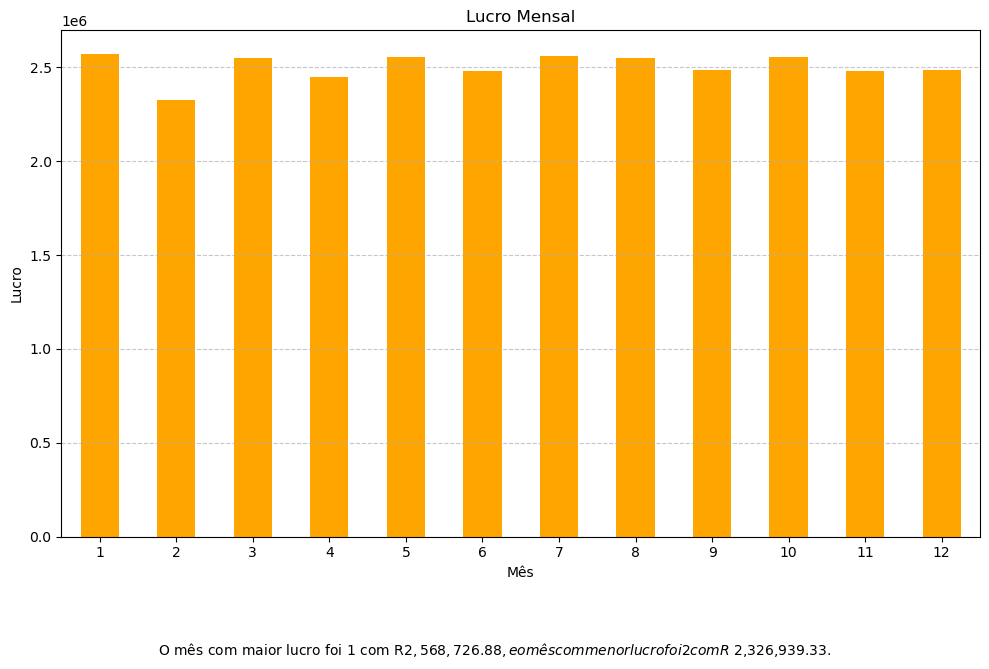

In [33]:
# Lucro Mensal

# Calcular o lucro (diferença entre valor de venda e valor de compra)
dados['Lucro'] = dados['Valor de venda'] - dados['Valor de compra']

# Extrair o mês da coluna 'Data'
dados['Mês'] = dados['Data'].dt.month

# Agrupar os dados por mês e calcular o lucro total em cada mês
lucro_mensal = dados.groupby('Mês')['Lucro'].sum()

# Identificar o mês com o maior e o menor lucro
mes_maior_lucro = lucro_mensal.idxmax()
mes_menor_lucro = lucro_mensal.idxmin()

# Criar o gráfico de barras com os valores nas barras
plt.figure(figsize=(10, 6))
ax = lucro_mensal.plot(kind='bar', color='orange')
plt.title('Lucro Mensal')
plt.xlabel('Mês')
plt.ylabel('Lucro')
plt.xticks(rotation=0)


# Adicionar nota de rodapé
maior_lucro = lucro_mensal.max()
menor_lucro = lucro_mensal.min()
nota_rodape = f"O mês com maior lucro foi {mes_maior_lucro} com R$ {maior_lucro:,.2f}, e o mês com menor lucro foi {mes_menor_lucro} com R$ {menor_lucro:,.2f}."
plt.figtext(0.5, -0.1, nota_rodape, wrap=True, horizontalalignment='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [45]:
# Modelo com maior margem de Lucro

# Calcular o lucro (diferença entre valor de venda e valor de compra)
dados['Lucro'] = dados['Valor de venda'] - dados['Valor de compra']

# Calcular o lucro médio por modelo de pneu
lucro_medio_por_modelo = dados.groupby('Modelo do pneu')['Lucro'].mean()

# Ordenar o lucro médio por modelo de pneu do maior para o menor
lucro_medio_por_modelo = lucro_medio_por_modelo.sort_values(ascending=False)

# Mostrar o lucro médio por modelo de pneu
print("Lucro Médio por Modelo de Pneu (do maior para o menor):")
for modelo, lucro_medio in lucro_medio_por_modelo.items():
    print(f"{modelo} - R$ {lucro_medio:.2f}")

Lucro Médio por Modelo de Pneu (do maior para o menor):
275/35 R23 - R$ 60.27
205/55 R16 - R$ 60.23
225/50 R18 - R$ 60.17
255/40 R21 - R$ 60.16
265/50 R22 - R$ 60.15
235/70 R19 - R$ 60.05
245/45 R20 - R$ 60.03
195/60 R15 - R$ 60.02
285/30 R24 - R$ 60.01
215/65 R17 - R$ 59.79


In [50]:
# Modelo que mais gerou Lucro

# Encontrar o modelo que mais teve venda
modelo_mais_vendido = dados['Modelo do pneu'].value_counts().idxmax()

# Contar o número de vendas do modelo mais vendido
quantidade_vendas = dados['Modelo do pneu'].value_counts().max()

# Mostrar o modelo que mais teve venda
print(f"O modelo que mais teve venda foi '{modelo_mais_vendido}' com {quantidade_vendas} vendas.")


O modelo que mais teve venda foi '205/55 R16' com 50224 vendas.


In [51]:
import pandas as pd

# Carregar o arquivo CSV
dados = pd.read_csv('dados_loja_pneus.csv')

# Calcular a porcentagem de lucro para cada modelo de pneu
dados['Porcentagem de Lucro'] = ((dados['Valor de venda'] - dados['Valor de compra']) / dados['Valor de compra']) * 100

# Calcular a média da porcentagem de lucro para cada modelo de pneu
media_porcentagem_lucro_por_modelo = dados.groupby('Modelo do pneu')['Porcentagem de Lucro'].mean()

# Mostrar a média da porcentagem de lucro para cada modelo de pneu
print("Média da Porcentagem de Lucro por Modelo de Pneu:")
for modelo, media_porcentagem_lucro in media_porcentagem_lucro_por_modelo.items():
    print(f"{modelo} - {media_porcentagem_lucro:.2f}%")


Média da Porcentagem de Lucro por Modelo de Pneu:
195/60 R15 - 30.09%
205/55 R16 - 29.98%
215/65 R17 - 30.01%
225/50 R18 - 29.91%
235/70 R19 - 29.97%
245/45 R20 - 30.00%
255/40 R21 - 29.97%
265/50 R22 - 29.98%
275/35 R23 - 29.95%
285/30 R24 - 29.96%


Text(0.5, -0.1, 'O cliente que mais comprou durante o ano foi Calebe Cardoso e o que menos comprou foi  Davi Cardoso .')

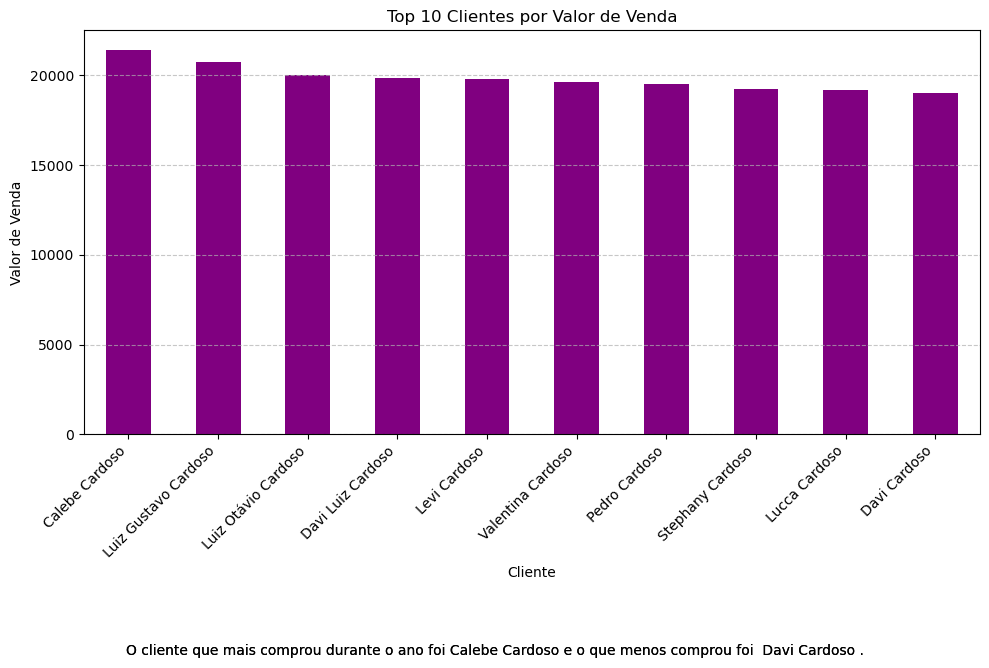

In [64]:
# Analise de Vendas por Cliente

# Calcular a soma de vendas por cliente
vendas_cliente = dados.groupby('Nome do Cliente')['Valor de venda'].sum()

# Selecionar os top 10.
top_10_cliente = vendas_cliente.nlargest(10)

# Identificar o melhor cliente e o pior
melhor_cliente = top_10_cliente.idxmax()
pior_cliente = top_10_cliente.idxmin()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
top_10_cliente.plot(kind='bar', color='purple')
plt.title('Top 10 Clientes por Valor de Venda')
plt.xlabel('Cliente')
plt.ylabel('Valor de Venda')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


nota_rodape = (f"O cliente que mais comprou durante o ano foi {melhor_cliente} e o que menos comprou foi  {pior_cliente} .")
plt.figtext(0.5, -0.1, nota_rodape, wrap=True, horizontalalignment='center', fontsize=10)

nota_rodape = (f"O cliente que mais comprou durante o ano foi {melhor_cliente} e o que menos comprou foi  {pior_cliente} .")
plt.figtext(0.5, -0.1, nota_rodape, wrap=True, horizontalalignment='center', fontsize=10)

In [67]:
# Analise de Vendas por Regiao

# Calcular a vendas por cidade
vendas_cidade = dados.groupby('Cidade do Comprador')['Valor de venda'].sum()

# Ordenar a vendas por cidade do maior para o menor
vendas_cidade = vendas_cidade.sort_values(ascending=False)

vendas_cidade.head()

Cidade do Comprador
Sorocaba               13064359.16
Osasco                 13060532.18
São José dos Campos    13041624.56
Campinas               13035301.64
São Paulo              13030909.72
Name: Valor de venda, dtype: float64

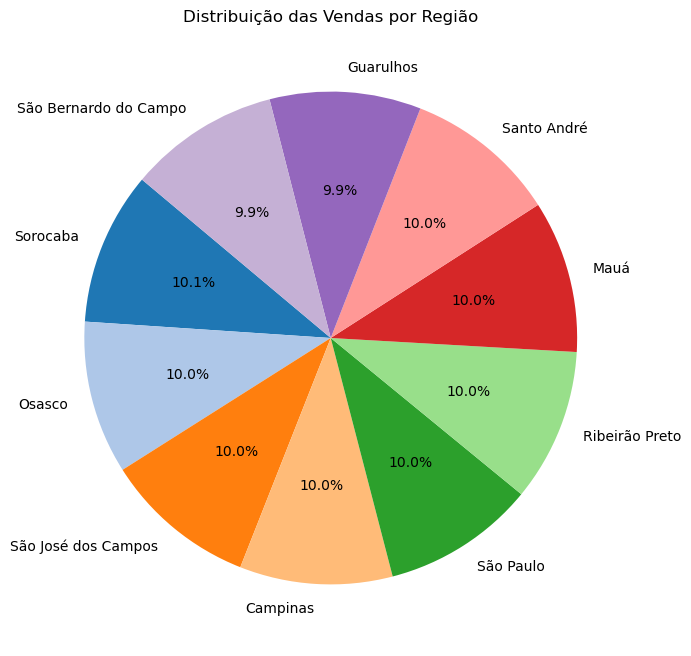

In [69]:
# Criando grafico de barras.

plt.figure(figsize=(8, 8))
vendas_cidade.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribuição das Vendas por Região')
plt.ylabel('')
plt.show()

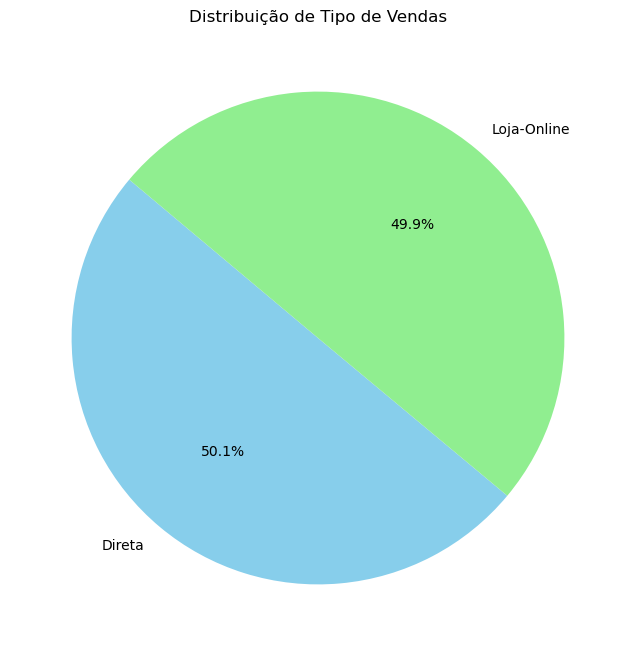

In [81]:
# Analise por Tipo de Venda

# Contar o número de ocorrências de cada tipo de venda
tipo_venda = dados['Venda (Direta ou Loja-Online)'].value_counts()

# Plotar o gráfico de pizza
plt.figure(figsize=(8, 8))
tipo_venda.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Distribuição de Tipo de Vendas')
plt.ylabel('')
plt.show()

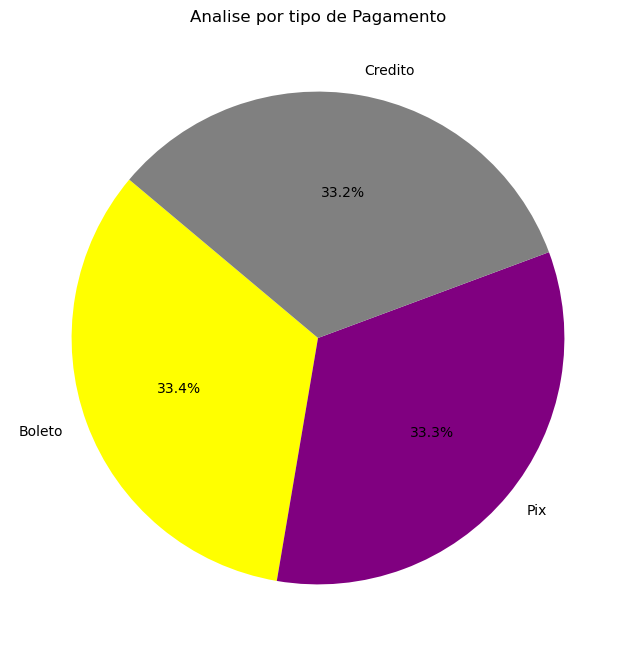

In [88]:
# Analise por tipo de Pagamento

# Contar o tipo de pagamento realizado
tipo_pagamento = dados['Tipo de pagamento'].value_counts()

# Plotar o grafico de pizza
plt.figure(figsize=(8,8))
tipo_pagamento.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['yellow', 'purple', 'grey'])
plt.title('Analise por tipo de Pagamento')
plt.ylabel('')
plt.show()